## Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import joblib

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


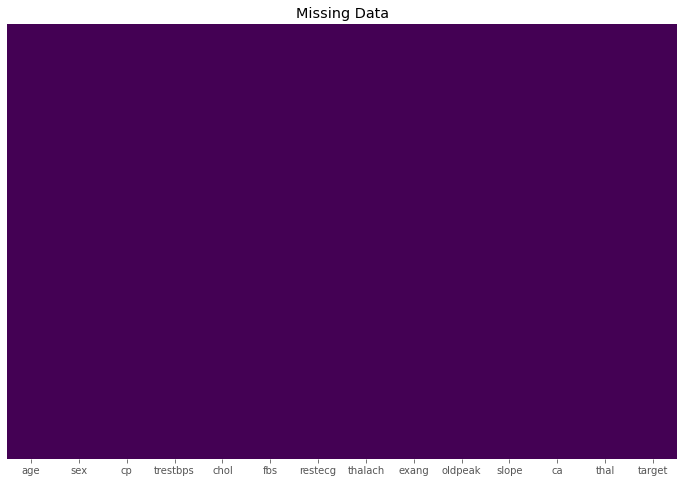

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
plt.title('Missing Data')
plt.show()

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

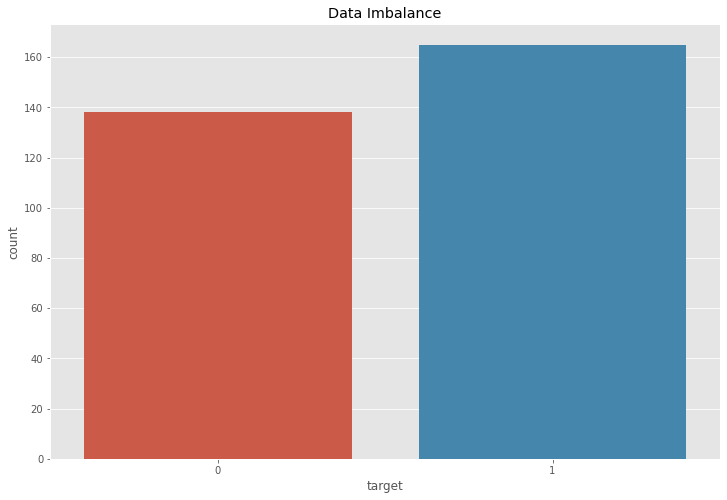

In [8]:
sns.countplot(x = 'target', data = data)
plt.title("Data Imbalance")
plt.show()

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


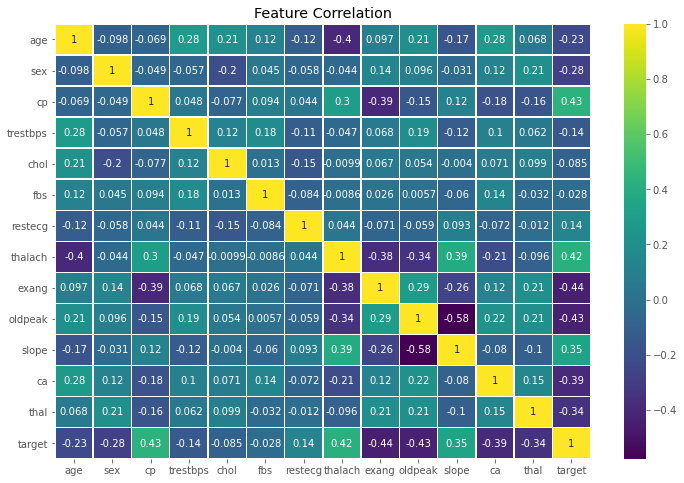

In [11]:
sns.heatmap(data.corr(), annot=True, linewidth = 0.5, cmap = 'viridis')
plt.title('Feature Correlation')
plt.show()

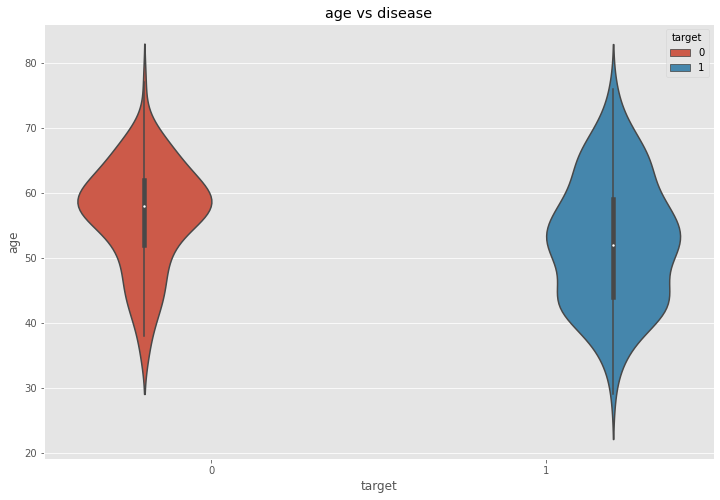

In [12]:
sns.violinplot(x = 'target', data = data, y = 'age', hue = 'target')
plt.title('age vs disease')
plt.show()

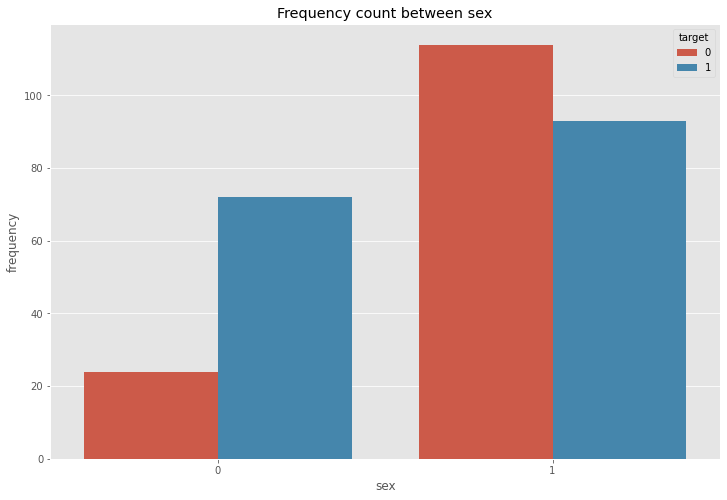

In [13]:
sns.countplot(x = 'sex', data = data, hue = 'target')
plt.ylabel('frequency')
plt.title('Frequency count between sex')
plt.show()

In [14]:
for col in data:
    print(col, data[col].nunique())

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


## Data Preprocessing

In [15]:
df = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca'])

In [16]:
df.head()

,age,trestbps,chol,thalach,oldpeak,thal,target,sex_0,sex_1,cp_0,...,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,145,233,150,2.3,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1,37,130,250,187,3.5,2,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,130,204,172,1.4,2,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3,56,120,236,178,0.8,2,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,120,354,163,0.6,2,1,1,0,1,...,0,1,0,0,1,1,0,0,0,0


In [17]:
X = df.drop(['target', 'thal'], axis = 1)
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [19]:
X_train.shape

(272, 26)

In [20]:
y_train.shape

(272,)

In [21]:
y_train.value_counts()

1    148
0    124
Name: target, dtype: int64

## XGBoost

In [22]:
xgb_clf = xgb.XGBClassifier(max_depth = 5,
                           n_estimators = 250,
                           learning_rate = 0.01,
                           n_jobs = -1)

In [23]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_pred = xgb_clf.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.7741935483870968

In [26]:
filename = "model/xgboost.sav"
joblib.dump(xgb_clf, open(filename, 'wb'))

## Grid Search Xgboost

In [27]:
xgb_clf2 = xgb.XGBClassifier(random_state = 42)

In [28]:
param_test = {
    'max-depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.2],
    'subsample':[0.5, 0.9],
    'colsample_bytree':[0.8, 0.9],
    'reg_alpha':[0.01, 0.1, 1],
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[250, 500, 1000]
}

In [29]:
grid_search = GridSearchCV(xgb_clf2, param_test, n_jobs=-1, cv = 5, scoring='accuracy')

In [30]:
grid_search.fit(X_train, y_train)

[20:02:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max-depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [31]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max-depth': 3,
 'n_estimators': 250,
 'reg_alpha': 1,
 'subsample': 0.9}

In [32]:
cvxgb_clf = grid_search.best_estimator_

In [33]:
y_pred = cvxgb_clf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.7419354838709677

In [35]:
filename = "model/grid_search_xgboost.sav"
joblib.dump(xgb_clf, open(filename, 'wb'))

## Random Forest and Grid Search

In [36]:
rf_clf = RandomForestClassifier(random_state=42)

In [37]:
param_test = {
    'n_estimators':range(2, 20, 2),
}

In [38]:
grid_search = GridSearchCV(rf_clf, param_test, n_jobs=-1, cv = 10, scoring='accuracy')

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1, param_grid={'n_estimators': range(2, 20, 2)},
             scoring='accuracy')

In [40]:
grid_search.best_params_

{'n_estimators': 18}

In [41]:
cvrf_clf = grid_search.best_estimator_

In [42]:
y_pred = cvrf_clf.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.8064516129032258

In [44]:
filename = "model/grid_search_rf.sav"
joblib.dump(xgb_clf, open(filename, 'wb'))

## Adaboost

In [45]:
rf_clf = RandomForestClassifier(random_state=42)
ada_clf = AdaBoostClassifier(rf_clf)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))

In [46]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7741935483870968

In [47]:
filename = "model/adaboost.sav"
joblib.dump(xgb_clf, open(filename, 'wb'))

## KNN

In [48]:
knn_scores = []
for i in range(1, 21):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_clf, X_train, y_train, cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

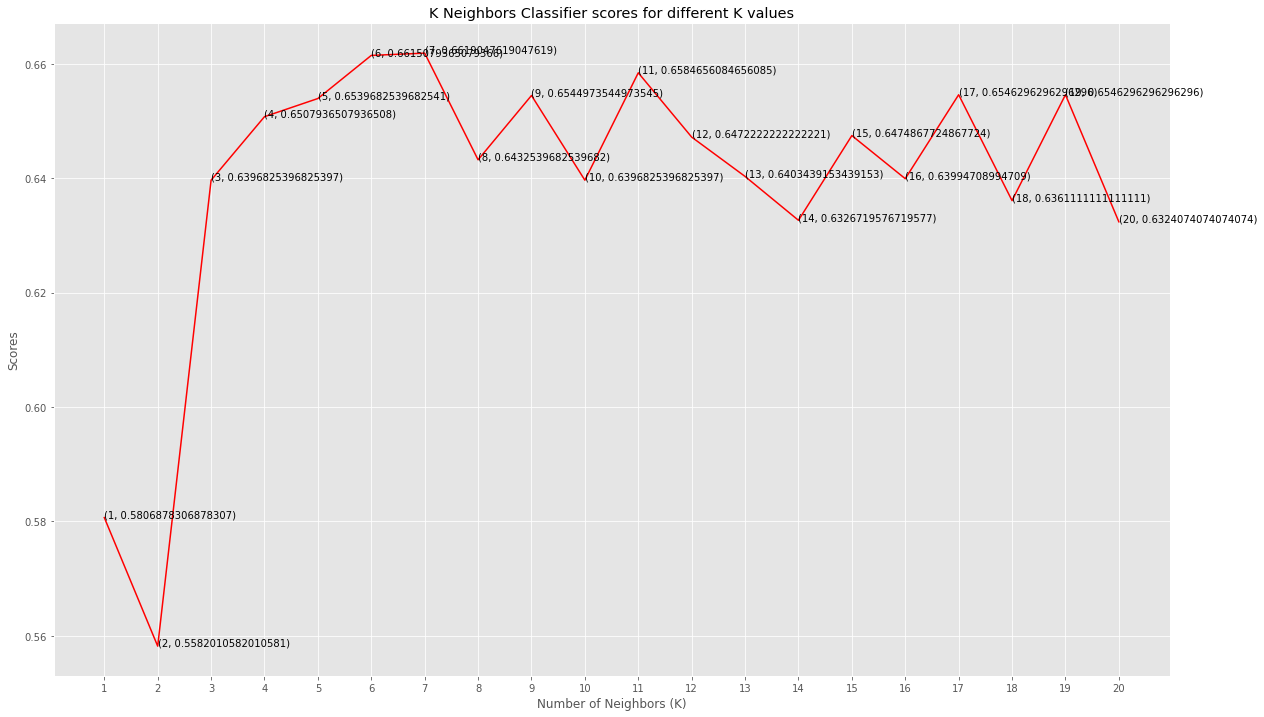

In [49]:
plt.rcParams['figure.figsize'] = (20, 12)
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [50]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
score=cross_val_score(knn_clf,X_train,y_train,cv=10)
score.mean()

0.6324074074074074

In [51]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [52]:
y_pred = knn_clf.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7096774193548387

In [54]:
filename = "model/knn.sav"
joblib.dump(xgb_clf, open(filename, 'wb'))